In [1]:
from fake_useragent import UserAgent
ua = UserAgent()

ua.ie
# Mozilla/5.0 (Windows; U; MSIE 9.0; Windows NT 9.0; en-US);
ua.msie
# Mozilla/5.0 (compatible; MSIE 10.0; Macintosh; Intel Mac OS X 10_7_3; Trident/6.0)'
ua['Internet Explorer']
# Mozilla/5.0 (compatible; MSIE 8.0; Windows NT 6.1; Trident/4.0; GTB7.4; InfoPath.2; SV1; .NET CLR 3.3.69573; WOW64; en-US)
ua.opera
# Opera/9.80 (X11; Linux i686; U; ru) Presto/2.8.131 Version/11.11
ua.chrome
# Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.2 (KHTML, like Gecko) Chrome/22.0.1216.0 Safari/537.2'
ua.google
# Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_4) AppleWebKit/537.13 (KHTML, like Gecko) Chrome/24.0.1290.1 Safari/537.13
ua['google chrome']
# Mozilla/5.0 (X11; CrOS i686 2268.111.0) AppleWebKit/536.11 (KHTML, like Gecko) Chrome/20.0.1132.57 Safari/536.11
ua.firefox
# Mozilla/5.0 (Windows NT 6.2; Win64; x64; rv:16.0.1) Gecko/20121011 Firefox/16.0.1
ua.ff
# Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:15.0) Gecko/20100101 Firefox/15.0.1
ua.safari
# Mozilla/5.0 (iPad; CPU OS 6_0 like Mac OS X) AppleWebKit/536.26 (KHTML, like Gecko) Version/6.0 Mobile/10A5355d Safari/8536.25

# and the best one, random via real world browser usage statistic
ua.random

'Mozilla/5.0 (compatible; MSIE 8.0; Windows NT 5.2; Trident/4.0; Media Center PC 4.0; SLCC1; .NET CLR 3.0.04320)'

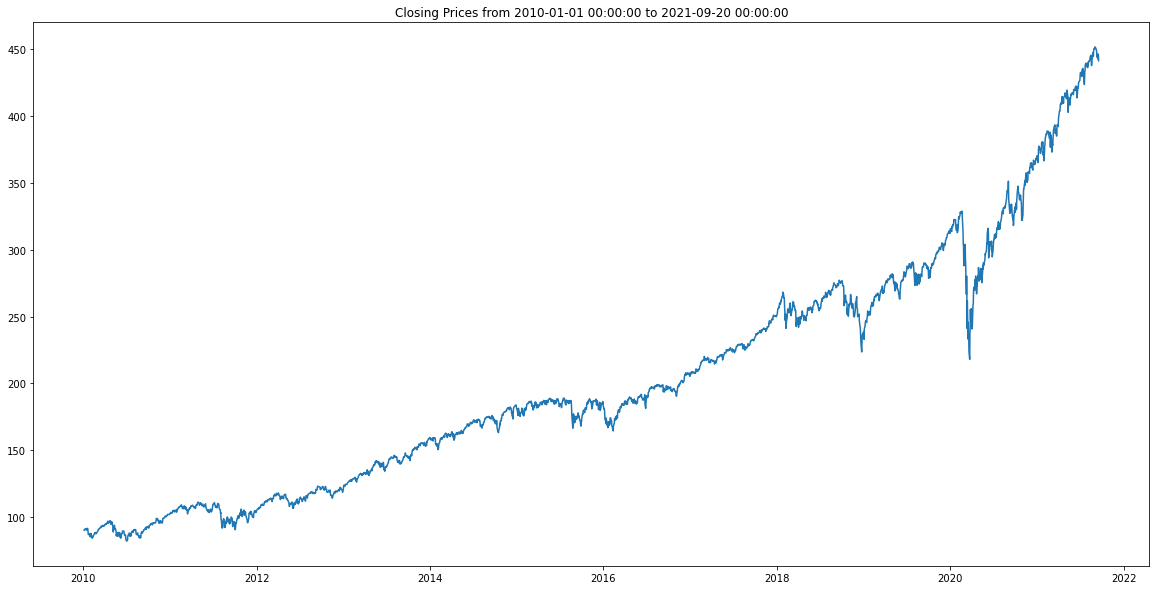

In [2]:
# import modules
import talib
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from functools import reduce
import quandl
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
from datetime import datetime
import selenium
  
# initialize parameters
start_date = datetime(2010, 1, 1)
test_date = datetime(2009, 1, 1)
end_date = datetime(2021, 9, 20)
  
# get the data
#data = yf.download('SPY', start = start_date,
                   #end = end_date)

spy = yf.Ticker("SPY")
data = spy.history(start = start_date,
                   end = end_date)  

data2 = spy.history(start = start_date,
                   end = end_date)  

data3 = spy.history(start = start_date,
                   end = end_date)  

Open = data2['Open']
High = data2["High"]
Low = data2['Low']
Close = data2['Close']
Volume = data2['Volume']
  
# display
plt.figure(figsize = (20,10))
plt.title('Closing Prices from {} to {}'.format(start_date,
                                                end_date))
plt.plot(data['Close'])
plt.show()

In [3]:
#print(data["Close"])

#data = pd.DataFrame(data["Close"])

data = pd.DataFrame(data[15:])
data = data.drop('Dividends',axis=1)
data = data.drop('Stock Splits',axis=1)

data = pd.DataFrame(data.values)

data.columns = ['Open','High','Low','Close','Volume']

#2nd Data Frame
data3 = pd.DataFrame(data3[15:])
data3 = data3.drop('Dividends',axis=1)
data3 = data3.drop('Stock Splits',axis=1)
data3 = pd.DataFrame(data3.values)
data3.columns = ['Open','High','Low','Close','Volume']
 
#Creating Prev_Close    
Prev_Close = data3['Close'].values
Prev_Close = pd.DataFrame(Prev_Close)
Prev_Close.columns = ['Prev Close']

#Make it so that close is from the following day so can use open, high, low and volume from day prior as predictive variables for the following day's price
data['Close'][0:2932] = data['Close'][1:2934]

#Merging dataframes
data = pd.concat([Prev_Close,data],axis=1)

data

,Prev Close,Open,High,Low,Close,Volume
0,87.005272,87.029172,87.928600,86.790391,87.419182,211168800.0
1,87.419205,86.893852,87.618169,86.225257,86.416313,271863600.0
2,86.416313,87.705755,87.753510,85.890989,85.477104,316104000.0
3,85.477081,86.790423,87.395347,85.341794,86.806320,310677600.0
4,86.806313,86.082009,86.814281,85.564640,87.856995,187865000.0
...,...,...,...,...,...,...
2928,445.153870,447.207319,447.486424,442.691756,442.751587,83738600.0
2929,442.751587,446.688955,446.908253,441.804609,446.449738,78197100.0
2930,446.449738,443.200138,446.978044,442.023914,445.742004,78792200.0
2931,445.742004,445.891519,446.928176,442.602039,441.399994,77786700.0


In [4]:
##ROC FOR DAY BEFORE

ROC2 = talib.ROC(data2["Close"], timeperiod = 5)

ROC2 = pd.DataFrame(ROC2[15:2949].values)
ROC2.columns =['ROC 2']

ROC2

,ROC 2
0,-4.997425
1,-3.564855
2,-2.802125
3,-1.666507
4,-0.646807
...,...
2928,-1.434626
2929,-1.614755
2930,-0.671975
2931,-0.403138


In [5]:
##PREDICTING ROC DAY OF

ROC = talib.ROC(data2["Close"], timeperiod = 1)

ROC = pd.DataFrame(ROC[16:2948].values)
ROC.columns =['ROC']

ROC

,ROC
0,0.475703
1,-1.147195
2,-1.086842
3,1.555055
4,1.210366
...,...
2927,0.255925
2928,-0.539652
2929,0.835265
2930,-0.158525


In [6]:
rsi = talib.RSI(data2["Close"], timeperiod = 2)

rsi = pd.DataFrame(rsi[15:2947].values)
rsi.columns =['RSI']

rsi

,RSI
0,18.570070
1,48.572182
2,17.437505
3,7.923912
4,63.810426
...,...
2927,1.301121
2928,32.538837
2929,13.916428
2930,68.833728


In [7]:
WMA12 = talib.WMA(data2['Close'],timeperiod=12)

WMA12 = pd.DataFrame(WMA12[15:2948].values)

WMA12.columns =['WMA 12']

In [8]:
WMA2 = talib.WMA(data2['Close'],timeperiod=2)

WMA2 = pd.DataFrame(WMA2[15:2948].values)

WMA2.columns =['WMA 2']

In [9]:
#APO = talib.APO(data2[fastperiod=2,slowperiod=3,matype=1])

APO = talib.APO(Close, fastperiod=2, slowperiod=3, matype=1)

APO = APO[15:2948].values

APO = pd.DataFrame(APO)

APO.columns =['APO']

APO

,APO
0,-0.275832
1,-0.097291
2,-0.202249
3,-0.308860
4,-0.002139
...,...
2928,-0.529506
2929,-0.681371
2930,0.136800
2931,0.109607


In [10]:
WCLPRICE = talib.WCLPRICE(High,Low,Close)

WCLPRICE = WCLPRICE[15:2948].values

WCLPRICE = pd.DataFrame(WCLPRICE)

WCLPRICE.columns =['WCLPRICE']

WCLPRICE

,WCLPRICE
0,87.182395
1,87.170447
2,86.619281
3,85.922837
4,86.497890
...,...
2928,445.121480
2929,443.554009
2930,445.475358
2931,445.253556


In [11]:
TYPPRICE = talib.TYPPRICE(High,Low,Close)

TYPPRICE = TYPPRICE[15:2948].values

TYPPRICE = pd.DataFrame(TYPPRICE)

TYPPRICE.columns =['TYPPRICE']

TYPPRICE

,TYPPRICE
0,87.241429
1,87.087536
2,86.686937
3,86.071415
4,86.395080
...,...
2928,445.110683
2929,443.821483
2930,445.150565
2931,445.090740


In [12]:
AVGPRICE = talib.AVGPRICE(High,Low,Open,Close)

AVGPRICE = AVGPRICE[15:2948].values

AVGPRICE = pd.DataFrame(AVGPRICE)

AVGPRICE.columns =['AVGPRICE']

AVGPRICE

,AVGPRICE
0,87.188364
1,87.039115
2,86.941642
3,86.251167
4,86.316813
...,...
2928,445.634842
2929,444.538351
2930,444.662958
2931,445.290935


In [13]:
ATR = talib.ATR(High,Low,Close,timeperiod=2)

ATR = ATR[15:2948].values

ATR = pd.DataFrame(ATR)

ATR.columns =['ATR']

ATR

,ATR
0,1.294572
1,1.343742
2,1.603131
3,1.828342
4,1.582760
...,...
2928,4.730240
2929,4.916942
2930,4.935536
2931,4.630836


In [14]:
TRANGE = talib.TRANGE(High,Low,Close)

TRANGE = TRANGE[15:2948].values

TRANGE = pd.DataFrame(TRANGE)

TRANGE.columns =['TRANGE']

TRANGE

,TRANGE
0,1.138209
1,1.392912
2,1.862521
3,2.053553
4,1.337177
...,...
2928,4.794668
2929,5.103645
2930,4.954130
2931,4.326137


In [55]:
spy = pd.concat([data,WMA12,WMA2,ROC2,WCLPRICE,TYPPRICE,AVGPRICE,ATR,TRANGE,APO],axis=1)

spy

,Prev Close,Open,High,Low,Close,Volume,WMA 12,WMA 2,ROC 2,WCLPRICE,TYPPRICE,AVGPRICE,ATR,TRANGE,APO
0,87.005272,87.029172,87.928600,86.790391,87.419182,211168800.0,89.116918,87.127345,-4.997425,87.182395,87.241429,87.188364,1.294572,1.138209,-0.275832
1,87.419205,86.893852,87.618169,86.225257,86.416313,271863600.0,88.738023,87.281219,-3.564855,87.170447,87.087536,87.039115,1.343742,1.392912,-0.097291
2,86.416313,87.705755,87.753510,85.890989,85.477104,316104000.0,88.253210,86.750603,-2.802125,86.619281,86.686937,86.941642,1.603131,1.862521,-0.202249
3,85.477081,86.790423,87.395347,85.341794,86.806320,310677600.0,87.686763,85.790174,-1.666507,85.922837,86.071415,86.251167,1.828342,2.053553,-0.308860
4,86.806313,86.082009,86.814281,85.564640,87.856995,187865000.0,87.388793,86.363248,-0.646807,86.497890,86.395080,86.316813,1.582760,1.337177,-0.002139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,445.153870,447.207319,447.486424,442.691756,442.751587,83738600.0,448.280016,444.775085,-1.434626,445.121480,445.110683,445.634842,4.730240,4.794668,-0.529506
2929,442.751587,446.688955,446.908253,441.804609,446.449738,78197100.0,447.363723,443.552348,-1.614755,443.554009,443.821483,444.538351,4.916942,5.103645,-0.681371
2930,446.449738,443.200138,446.978044,442.023914,445.742004,78792200.0,447.043085,445.217021,-0.671975,445.475358,445.150565,444.662958,4.935536,4.954130,0.136800
2931,445.742004,445.891519,446.928176,442.602039,441.399994,77786700.0,446.643853,445.977915,-0.403138,445.253556,445.090740,445.290935,4.630836,4.326137,0.109607


In [54]:
spy.corr()['Close'].sort_values()

Volume       -0.528804
ROC 2         0.050425
RSI           0.058898
APO           0.107739
TRANGE        0.414864
ATR           0.457349
WMA 12        0.999097
Open          0.999511
High          0.999556
Low           0.999576
AVGPRICE      0.999626
WMA 2         0.999639
Prev Close    0.999640
TYPPRICE      0.999644
WCLPRICE      0.999649
Close         1.000000
Name: Close, dtype: float64

In [17]:
from sklearn.preprocessing import MinMaxScaler

X = spy[['Open','High','Low','WMA 2','Prev Close','WMA 12','Volume','WCLPRICE','TYPPRICE','AVGPRICE','ATR','TRANGE','APO']].values
y = spy['Close'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
model = Sequential()

model.add(Dense(13,activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(13,activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(1))

#model.compile(optimizer='rmsprop',loss='mse')

model.compile(optimizer='adam',loss='mse')

In [19]:
#Open = data2['Open']
#High = data2["High"]
#Low = data2['Low']
#Close = data2['Close']
#Volume = data2['Volume']

CDLLONGLINE = talib.CDLLONGLINE(Open,High,Low,Close)

CDLLONGLINE = pd.DataFrame(CDLLONGLINE[15:2947].values)

CDLLONGLINE.columns = ["CDLLONGLINE"]

In [20]:
Two_Crows = talib.CDL2CROWS(Open,High,Low,Close)

Two_Crows = (Two_Crows).values

Two_Crows = pd.DataFrame(Two_Crows)

Two_Crows.columns = ["Two Crows Day Prior"]

Two_Crows = Two_Crows[15:2947]


In [21]:
CDLHAMMER = talib.CDLHAMMER(Open,High,Low,Close)

CDLHAMMER = (CDLHAMMER).values

CDLHAMMER = pd.DataFrame(CDLHAMMER)

CDLHAMMER.columns = ["CDLHAMMER"]

CDLHAMMER = CDLHAMMER[15:2947]


In [22]:
CDLHANGINGMAN = talib.CDLHANGINGMAN(Open,High,Low,Close)

CDLHANGINGMAN = (CDLHANGINGMAN).values

CDLHANGINGMAN = pd.DataFrame(CDLHANGINGMAN)

CDLHANGINGMAN.columns = ["CDLHANGINGMAN"]

CDLHANGINGMAN = CDLHANGINGMAN[15:2947]


In [23]:
CDLHARAMI = talib.CDLHARAMI(Open,High,Low,Close)

CDLHARAMI = (CDLHARAMI).values

CDLHARAMI = pd.DataFrame(CDLHARAMI)

CDLHARAMI.columns = ["CDLHARAMI"]

CDLHARAMI = CDLHARAMI[15:2947]


In [24]:
CDLHARAMICROSS = talib.CDLHARAMICROSS(Open,High,Low,Close)

CDLHARAMICROSS = (CDLHARAMICROSS).values

CDLHARAMICROSS = pd.DataFrame(CDLHARAMICROSS)

CDLHARAMICROSS.columns = ["CDLHARAMI"]

CDLHARAMICROSS = CDLHARAMICROSS[15:2947]


In [25]:
CDLHIGHWAVE = talib.CDLHIGHWAVE(Open,High,Low,Close)

CDLHIGHWAVE = (CDLHIGHWAVE).values

CDLHIGHWAVE = pd.DataFrame(CDLHIGHWAVE)

CDLHIGHWAVE.columns = ["CDLHIGHWAVE"]

CDLHIGHWAVE = CDLHIGHWAVE[15:2947]


In [26]:
CDLHIKKAKE = talib.CDLHIKKAKE(Open,High,Low,Close)

CDLHIKKAKE = (CDLHIKKAKE).values

CDLHIKKAKE = pd.DataFrame(CDLHIKKAKE)

CDLHIKKAKE.columns = ["CDLHIKKAKE"]

CDLHIKKAKE = CDLHIKKAKE[15:2947]

In [27]:
CDLHIKKAKEMOD = talib.CDLHIKKAKEMOD(Open,High,Low,Close)

CDLHIKKAKEMOD = (CDLHIKKAKEMOD).values

CDLHIKKAKEMOD = pd.DataFrame(CDLHIKKAKEMOD)

CDLHIKKAKEMOD.columns = ["CDLHIKKAKEMOD"]

CDLHIKKAKEMOD = CDLHIKKAKEMOD[15:2947]

In [28]:
CDLHOMINGPIGEON = talib.CDLHOMINGPIGEON(Open,High,Low,Close)

CDLHOMINGPIGEON = (CDLHOMINGPIGEON).values

CDLHOMINGPIGEON = pd.DataFrame(CDLHOMINGPIGEON)

CDLHOMINGPIGEON.columns = ["CDLHOMINGPIGEON"]

CDLHOMINGPIGEON = CDLHOMINGPIGEON[15:2947]

In [29]:
CDLDOJI = talib.CDLDOJI(Open,High,Low,Close)

CDLDOJI = (CDLDOJI).values

CDLDOJI = pd.DataFrame(CDLDOJI)

CDLDOJI.columns = ["CDLDOJI"]

CDLDOJI = CDLDOJI[15:2947]

In [30]:
CDLDOJISTAR = talib.CDLDOJISTAR(Open,High,Low,Close)

CDLDOJISTAR = (CDLDOJISTAR).values

CDLDOJISTAR = pd.DataFrame(CDLDOJISTAR)

CDLDOJISTAR.columns = ["CDLDOJISTAR"]

CDLDOJISTAR = CDLDOJISTAR[15:2947]

In [31]:
CDLDRAGONFLYDOJI = talib.CDLDRAGONFLYDOJI(Open,High,Low,Close)

CDLDRAGONFLYDOJI = (CDLDRAGONFLYDOJI).values

CDLDRAGONFLYDOJI = pd.DataFrame(CDLDRAGONFLYDOJI)

CDLDRAGONFLYDOJI.columns = ["CDLDRAGONFLYDOJI"]

CDLDRAGONFLYDOJI = CDLDRAGONFLYDOJI[15:2947]

In [32]:
CDLENGULFING = talib.CDLENGULFING(Open,High,Low,Close)

CDLENGULFING = (CDLENGULFING).values

CDLENGULFING = pd.DataFrame(CDLENGULFING)

CDLENGULFING.columns = ["CDLENGULFING"]

CDLENGULFING = CDLENGULFING[15:2947]

In [33]:
CDLEVENINGDOJISTAR = talib.CDLEVENINGDOJISTAR(Open,High,Low,Close)

CDLEVENINGDOJISTAR = (CDLEVENINGDOJISTAR).values

CDLEVENINGDOJISTAR = pd.DataFrame(CDLEVENINGDOJISTAR)

CDLEVENINGDOJISTAR.columns = ["CDLEVENINGDOJISTAR"]

CDLEVENINGDOJISTAR = CDLEVENINGDOJISTAR[15:2947]

In [34]:
CDLEVENINGSTAR = talib.CDLEVENINGSTAR(Open,High,Low,Close)

CDLEVENINGSTAR = (CDLEVENINGSTAR).values

CDLEVENINGSTAR = pd.DataFrame(CDLEVENINGSTAR)

CDLEVENINGSTAR.columns = ["CDLEVENINGSTAR"]

CDLEVENINGSTAR = CDLEVENINGSTAR[15:2947]

In [35]:
CDLINVERTEDHAMMER = talib.CDLINVERTEDHAMMER(Open,High,Low,Close)

CDLINVERTEDHAMMER = (CDLINVERTEDHAMMER).values

CDLINVERTEDHAMMER = pd.DataFrame(CDLINVERTEDHAMMER)

CDLINVERTEDHAMMER.columns = ["CDLINVERTEDHAMMER"]

CDLINVERTEDHAMMER = CDLINVERTEDHAMMER[15:2947]

In [36]:
CDLLONGLEGGEDDOJI = talib.CDLLONGLEGGEDDOJI(Open,High,Low,Close)

CDLLONGLEGGEDDOJI = (CDLLONGLEGGEDDOJI).values

CDLLONGLEGGEDDOJI = pd.DataFrame(CDLLONGLEGGEDDOJI)

CDLLONGLEGGEDDOJI.columns = ["CDLLONGLEGGEDDOJI"]

CDLLONGLEGGEDDOJI = CDLLONGLEGGEDDOJI[15:2947]

In [37]:
CDLMORNINGDOJISTAR = talib.CDLMORNINGDOJISTAR(Open,High,Low,Close)

CDLMORNINGDOJISTAR = (CDLMORNINGDOJISTAR).values

CDLMORNINGDOJISTAR = pd.DataFrame(CDLMORNINGDOJISTAR)

CDLMORNINGDOJISTAR.columns = ["CDLMORNINGDOJISTAR"]

CDLMORNINGDOJISTAR = CDLMORNINGDOJISTAR[15:2947]

In [38]:
CDLTHRUSTING = talib.CDLTHRUSTING(Open,High,Low,Close)

CDLTHRUSTING = (CDLTHRUSTING).values

CDLTHRUSTING = pd.DataFrame(CDLTHRUSTING)

CDLTHRUSTING.columns = ["CDLTHRUSTING"]

CDLTHRUSTING = CDLTHRUSTING[15:2947]

In [39]:
CDLXSIDEGAP3METHODS = talib.CDLXSIDEGAP3METHODS(Open,High,Low,Close)

CDLXSIDEGAP3METHODS = (CDLXSIDEGAP3METHODS).values

CDLXSIDEGAP3METHODS = pd.DataFrame(CDLXSIDEGAP3METHODS)

CDLXSIDEGAP3METHODS.columns = ["CDLXSIDEGAP3METHODS"]

CDLXSIDEGAP3METHODS = CDLXSIDEGAP3METHODS[15:2947]

In [40]:
CDLUPSIDEGAP2CROWS = talib.CDLUPSIDEGAP2CROWS(Open,High,Low,Close)

CDLUPSIDEGAP2CROWS = (CDLUPSIDEGAP2CROWS).values

CDLUPSIDEGAP2CROWS = pd.DataFrame(CDLUPSIDEGAP2CROWS)

CDLUPSIDEGAP2CROWS.columns = ["CDLUPSIDEGAP2CROWS"]

CDLUPSIDEGAP2CROWS = CDLUPSIDEGAP2CROWS[15:2947]

In [41]:
CDLUNIQUE3RIVER = talib.CDLUNIQUE3RIVER(Open,High,Low,Close)

CDLUNIQUE3RIVER = (CDLUNIQUE3RIVER).values

CDLUNIQUE3RIVER = pd.DataFrame(CDLUNIQUE3RIVER)

CDLUNIQUE3RIVER.columns = ["CDLUNIQUE3RIVER"]

CDLUNIQUE3RIVER = CDLUNIQUE3RIVER[15:2947]

In [42]:
CDLTRISTAR = talib.CDLTRISTAR(Open,High,Low,Close)

CDLTRISTAR = (CDLTRISTAR).values

CDLTRISTAR = pd.DataFrame(CDLTRISTAR)

CDLTRISTAR.columns = ["CDLTRISTAR"]

CDLTRISTAR = CDLTRISTAR[15:2947]

In [43]:
CDLTASUKIGAP = talib.CDLTASUKIGAP(Open,High,Low,Close)

CDLTASUKIGAP = (CDLTASUKIGAP).values

CDLTASUKIGAP = pd.DataFrame(CDLTASUKIGAP)

CDLTASUKIGAP.columns = ["CDLTASUKIGAP"]

CDLTASUKIGAP = CDLTASUKIGAP[15:2947]

In [44]:
new = pd.concat([ROC,rsi,CDLTRISTAR,CDLEVENINGSTAR,CDLEVENINGDOJISTAR,CDLLONGLEGGEDDOJI,CDLINVERTEDHAMMER,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLMORNINGDOJISTAR,CDLTHRUSTING,CDLXSIDEGAP3METHODS,CDLTASUKIGAP,CDLLONGLINE,Two_Crows,CDLHAMMER,CDLHANGINGMAN,CDLHARAMI,CDLHARAMICROSS,CDLHIGHWAVE,CDLHIKKAKE,CDLHIKKAKEMOD,CDLENGULFING,CDLDRAGONFLYDOJI,CDLDOJISTAR,CDLDOJI,CDLHOMINGPIGEON,],axis=1)

new

new.corr()['ROC'].sort_values()

CDLHIKKAKE            -0.039971
CDLTASUKIGAP          -0.033792
RSI                   -0.030662
CDLHAMMER             -0.023240
CDLTHRUSTING          -0.022990
CDLINVERTEDHAMMER     -0.017106
CDLLONGLINE           -0.014899
CDLUPSIDEGAP2CROWS    -0.013742
CDLHIKKAKEMOD         -0.010656
Two Crows Day Prior   -0.006513
CDLHARAMI             -0.004844
CDLTRISTAR            -0.004575
CDLUNIQUE3RIVER       -0.003562
CDLLONGLEGGEDDOJI     -0.002995
CDLDOJI               -0.002995
CDLDOJISTAR            0.001468
CDLHOMINGPIGEON        0.006558
CDLMORNINGDOJISTAR     0.006948
CDLHIGHWAVE            0.007985
CDLENGULFING           0.008404
CDLEVENINGDOJISTAR     0.010002
CDLHANGINGMAN          0.010923
CDLHARAMI              0.014054
CDLEVENINGSTAR         0.015040
CDLXSIDEGAP3METHODS    0.034081
CDLDRAGONFLYDOJI       0.039138
ROC                    1.000000
Name: ROC, dtype: float64

In [45]:
from keras.callbacks import History 
history = History()

early_stop = EarlyStopping(monitor = 'val_loss',mode='min',verbose=1,patience=200, restore_best_weights=True)

EarlyStopping()
model.fit(x= X_train,y= y_train,validation_data = (X_test,y_test),batch_size=32,epochs=2000,callbacks=[early_stop])

Epoch 1/2000
65/65 [==============================] - 0s 2ms/step - loss: 48757.6445 - val_loss: 48671.7383
Epoch 2/2000
65/65 [==============================] - 0s 875us/step - loss: 48296.5039 - val_loss: 47881.1602
Epoch 3/2000
65/65 [==============================] - 0s 922us/step - loss: 46769.0352 - val_loss: 45066.7031
Epoch 4/2000
65/65 [==============================] - 0s 937us/step - loss: 41906.3242 - val_loss: 37940.3398
Epoch 5/2000
65/65 [==============================] - 0s 875us/step - loss: 32793.7031 - val_loss: 27098.4766
Epoch 6/2000
65/65 [==============================] - 0s 844us/step - loss: 21192.4199 - val_loss: 15254.6406
Epoch 7/2000
65/65 [==============================] - 0s 875us/step - loss: 10404.5664 - val_loss: 6134.7368
Epoch 8/2000
65/65 [==============================] - 0s 906us/step - loss: 3501.9399 - val_loss: 1616.1040
Epoch 9/2000
65/65 [==============================] - 0s 859us/step - loss: 844.6469 - val_loss: 369.0044
Epoch 10/2000
65/65

Epoch 79/2000
65/65 [==============================] - 0s 891us/step - loss: 9.6291 - val_loss: 8.1502
Epoch 80/2000
65/65 [==============================] - 0s 859us/step - loss: 9.5458 - val_loss: 7.9703
Epoch 81/2000
65/65 [==============================] - 0s 828us/step - loss: 9.3950 - val_loss: 7.8680
Epoch 82/2000
65/65 [==============================] - 0s 813us/step - loss: 9.3010 - val_loss: 7.8327
Epoch 83/2000
65/65 [==============================] - 0s 813us/step - loss: 9.1907 - val_loss: 7.7077
Epoch 84/2000
65/65 [==============================] - 0s 859us/step - loss: 9.0711 - val_loss: 7.5926
Epoch 85/2000
65/65 [==============================] - 0s 797us/step - loss: 9.0340 - val_loss: 7.5487
Epoch 86/2000
65/65 [==============================] - 0s 797us/step - loss: 8.9001 - val_loss: 7.7601
Epoch 87/2000
65/65 [==============================] - 0s 812us/step - loss: 8.8125 - val_loss: 7.4131
Epoch 88/2000
65/65 [==============================] - 0s 828us/step - lo

Epoch 158/2000
65/65 [==============================] - 0s 766us/step - loss: 5.7106 - val_loss: 5.8381
Epoch 159/2000
65/65 [==============================] - 0s 781us/step - loss: 6.1021 - val_loss: 5.8459
Epoch 160/2000
65/65 [==============================] - 0s 766us/step - loss: 5.6286 - val_loss: 5.6883
Epoch 161/2000
65/65 [==============================] - 0s 781us/step - loss: 5.6535 - val_loss: 5.7316
Epoch 162/2000
65/65 [==============================] - 0s 750us/step - loss: 5.6815 - val_loss: 5.9031
Epoch 163/2000
65/65 [==============================] - 0s 781us/step - loss: 5.7423 - val_loss: 6.1206
Epoch 164/2000
65/65 [==============================] - 0s 750us/step - loss: 5.7237 - val_loss: 5.8549
Epoch 165/2000
65/65 [==============================] - 0s 750us/step - loss: 5.7819 - val_loss: 5.8957
Epoch 166/2000
65/65 [==============================] - 0s 750us/step - loss: 5.7176 - val_loss: 6.3371
Epoch 167/2000
65/65 [==============================] - 0s 766us

Epoch 237/2000
65/65 [==============================] - 0s 813us/step - loss: 6.0171 - val_loss: 5.8378
Epoch 238/2000
65/65 [==============================] - 0s 922us/step - loss: 5.8960 - val_loss: 6.3319
Epoch 239/2000
65/65 [==============================] - 0s 781us/step - loss: 5.6994 - val_loss: 5.8271
Epoch 240/2000
65/65 [==============================] - 0s 781us/step - loss: 5.6687 - val_loss: 5.7817
Epoch 241/2000
65/65 [==============================] - 0s 766us/step - loss: 5.5653 - val_loss: 5.7667
Epoch 242/2000
65/65 [==============================] - 0s 813us/step - loss: 5.6506 - val_loss: 5.7812
Epoch 243/2000
65/65 [==============================] - 0s 781us/step - loss: 5.7067 - val_loss: 5.7332
Epoch 244/2000
65/65 [==============================] - 0s 781us/step - loss: 5.6847 - val_loss: 5.7815
Epoch 245/2000
65/65 [==============================] - 0s 750us/step - loss: 5.8120 - val_loss: 5.7724
Epoch 246/2000
65/65 [==============================] - 0s 781us

Epoch 316/2000
65/65 [==============================] - 0s 813us/step - loss: 5.5809 - val_loss: 5.7510
Epoch 317/2000
65/65 [==============================] - 0s 797us/step - loss: 5.7262 - val_loss: 5.8839
Epoch 318/2000
65/65 [==============================] - 0s 906us/step - loss: 5.7686 - val_loss: 6.8495
Epoch 319/2000
65/65 [==============================] - 0s 828us/step - loss: 5.7292 - val_loss: 6.0848
Epoch 320/2000
65/65 [==============================] - 0s 828us/step - loss: 5.5919 - val_loss: 5.8134
Epoch 321/2000
65/65 [==============================] - 0s 844us/step - loss: 5.5843 - val_loss: 6.3968
Epoch 322/2000
65/65 [==============================] - 0s 813us/step - loss: 5.7476 - val_loss: 5.8395
Epoch 323/2000
65/65 [==============================] - 0s 813us/step - loss: 5.7041 - val_loss: 5.7983
Epoch 324/2000
65/65 [==============================] - 0s 797us/step - loss: 5.8004 - val_loss: 6.5070
Epoch 325/2000
65/65 [==============================] - 0s 797us

<AxesSubplot:>

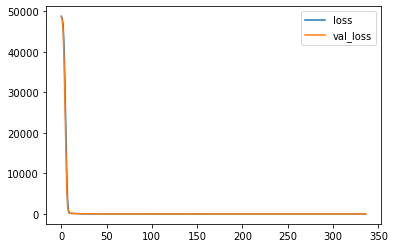

In [46]:
loss = pd.DataFrame(model.history.history)

loss.plot()

In [47]:
test_predictions = model.predict(X_test)

test_predictions = pd.Series(test_predictions.reshape(880,))

pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

pred_df = pd.concat([pred_df,test_predictions],axis=1)

pred_df.columns = ['Test True Y', 'Model Predictions']

pred_df

,Test True Y,Model Predictions
0,188.288040,186.380280
1,282.762024,283.777557
2,408.798676,409.926666
3,262.414673,259.988800
4,182.831589,181.684738
...,...,...
875,107.171349,106.661415
876,288.674500,289.644043
877,109.582184,110.862877
878,105.180595,106.247353


<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

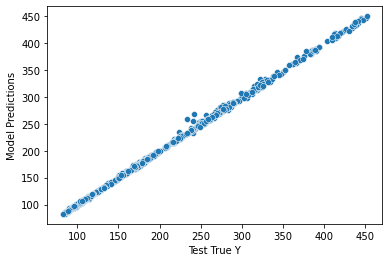

In [48]:
sns.scatterplot(x='Test True Y',y='Model Predictions',data = pred_df)

In [49]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score

mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

1.3647415161132812

In [50]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

5.6230608582521775

In [51]:
spy.describe()

,Prev Close,Open,High,Low,Close,Volume,WMA 12,WMA 2,ROC 2,WCLPRICE,TYPPRICE,AVGPRICE,ATR,TRANGE,APO
count,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2.933000e+03,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000
mean,202.594604,202.560381,203.586482,201.433340,202.715434,1.210144e+08,202.150004,202.554368,0.298902,202.552257,202.538142,202.543701,2.401832,2.402932,0.060663
std,87.991118,87.981959,88.387954,87.523350,88.075624,7.374124e+07,87.619174,87.955771,2.203329,87.969391,87.962807,87.966257,2.133404,2.356024,0.526013
min,82.069702,82.800447,83.049385,81.210443,82.069687,2.027000e+07,84.209150,82.219587,-17.969325,82.198173,82.241002,82.380863,0.373512,0.300314,-6.275060
25%,122.729546,122.753963,123.114376,122.344718,122.754646,7.004260e+07,121.940748,122.698878,-0.619143,122.771374,122.770807,122.699320,1.215917,1.108619,-0.121346
50%,185.540436,185.477087,186.385539,184.642335,185.549316,1.007689e+08,185.681605,185.600179,0.476973,185.557265,185.539954,185.522749,1.705226,1.674337,0.097012
75%,261.149323,261.373452,262.381090,259.629111,261.360504,1.498920e+08,260.114721,260.772725,1.453803,261.096052,261.053593,260.853832,2.756761,2.768553,0.291448
max,451.742767,451.872357,452.600006,450.466856,451.742767,7.178287e+08,449.858929,451.669668,17.358138,451.638099,451.603210,451.670497,26.538015,31.070184,3.932642


In [52]:
#'Open','High','Low','WMA 2','Prev Close','WMA 12','Volume'

close_guess = [[435.67,436.1,432.78,433.98,433.62,434.56,926368922]]

#close_guess = close_guess.reshape(-1, 1)

close_guess = scaler.transform(close_guess)

model.predict(close_guess)

ValueError: X has 7 features, but MinMaxScaler is expecting 14 features as input.

In [ ]:
##NEED TO INCORPOARTE CLOSE FROM DAY BEFORE INTO MODEL GUESS AS WELL